# **Visão Computacional:** Um pouco de imagens BMPs com Python

Este _notebook_ tem o objetivo de transmitir alguns conceitos básicos acerca de imagens BMP's utilizando a linguagem de programação Python. Desta forma, ao longo deste _notebook_, estará disponível explicações a respeito do comportamento de funções e determinados blocos de código. 



## **Preparando o ambiente**

Antes de iniciar executando qualquer dos blocos de código abaixo, é interessante o preparo do ambiente onde será extraído as imagens exemplos. Certifique-se de que possui uma pasta com imagens BMPs que deseja analisar em seu _Google Drive_.

Certo disto, execute o código abaixo, acesse o link e insera o código para que o _Colab_ tenha acesso ao seu _Drive_. Uma vez carregada as pastas ao lado, copie o _caminho do diretório_ quando solicitado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
pasta = input('Insira o caminho da pasta onde estão as imagens: ')

Mounted at /content/drive/
Insira o caminho da pasta onde estão as imagens: /content/drive/MyDrive/Colab Notebooks/Visão Computacional/imagens


## **Classes de leitura**

As imagens BMP podem ser dividas em quatro partes:
 + Cabeçalho do arquivo;
 + Cabeçalho mapa de bits / DIB (_Device independent bitmaps_);
 + Paleta de cores; e
 + Dados da imagens.

As classes definidas abaixo estão a representar, respectivamente: o _cabeçalho do arquivo_; o _cabeçalho mapa de bits_; e a _paleta de cores_. E, detalham-se estas:

|Linha | Tamanho | Nome | Classe | Campos |
|------|---------|------|--------|--------|
| 0 | 2 bytes | Cabeçalho do arquivo | `Cab` | Tipo |
| 1 | 4 bytes | Cabeçalho do arquivo | `Cab1` | Tamanho da imagem |
| 2 | 2 bytes | Cabeçalho do arquivo | `Cab1` | Reservado 1 |
| 3 | 2 bytes | Cabeçalho do arquivo | `Cab1` | Reservado 2 |
| 4 | 4 bytes | Cabeçalho do arquivo | `Cab1` | Início dos dados da imagem |
| 5 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Tamanho do cabeçalho da imagem |
| 6 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Altura |
| 7 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Largura |
| 8 | 2 bytes | Cabeçalho mapa de bits | `Cab2` | Planos |
| 9 | 2 bytes | Cabeçalho mapa de bits | `Cab2` | Bits por ponto |
| 10 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Tipo de compressão |
| 11 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Tamanho da imagem comprimida |
| 12 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Resolução horizontal |
| 13 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Resolução vertical |
| 14 | 4 bytes | Cabeçalho mapa de bits |`Cab2` | Nº máximo de cores |
| 15 | 4 bytes | Cabeçalho mapa de bits | `Cab2` | Nº cores usadas |
| 16 | 1 byte | Paleta de cores | `Cab3` | Red |
| 17 | 1 byte | Paleta de cores | `Cab3` | Green |
| 18 | 1 byte | Paleta de cores | `Cab3` | Blue |
| 19 | 1 byte | Paleta de cores | `Cab3` | Reservado |



In [ ]:
import struct

class Cab():
  def __init__(self, bmp):
    self.tipo = bmp.read(2).decode()


class Cab1():
  def __init__(self, bmp):
    self.tamanho_imagem = struct.unpack('I', bmp.read(4))[0]
    self.reservado_1 = struct.unpack('H', bmp.read(2))[0]
    self.reservado_2 = struct.unpack('H', bmp.read(2))[0]
    self.inicio_dados_imagem = struct.unpack('I', bmp.read(4))[0]


class Cab2():
  def __init__(self, bmp):
    self.tamanho_do_cabecalho_da_imagem = struct.unpack('I', bmp.read(4))[0]
    self.largura = struct.unpack('I', bmp.read(4))[0]
    self.altura = struct.unpack('I', bmp.read(4))[0]
    self.planos = struct.unpack('H', bmp.read(2))[0]
    self.bits_por_ponto = struct.unpack('H', bmp.read(2))[0]
    self.tipo_de_compressao = struct.unpack('I', bmp.read(4))[0]
    self.tamanho_da_imagem_comprimida = struct.unpack('I', bmp.read(4))[0]
    self.resolucao_horizontal = struct.unpack('I', bmp.read(4))[0]
    self.resolucao_vertical = struct.unpack('I', bmp.read(4))[0]
    self.numero_maximo_de_cores = struct.unpack('I', bmp.read(4))[0]
    self.numero_de_cores_usadas = struct.unpack('I', bmp.read(4))[0]

class Cab3():
  def __init__(self, bmp):
    self.red = struct.unpack('B', bmp.read(1))[0]
    self.green = struct.unpack('B', bmp.read(1))[0]
    self.blue = struct.unpack('B', bmp.read(1))[0]
    self.reserv = struct.unpack('B', bmp.read(1))[0]



## **Funções e manipulação de arquivo**

Para uma melhor organização e entendimento do código, foi criados métodos que atendem-se ao propósito de fazer interface na obtenção da imagem exemplo e verificação desta como um preventivo tratamento de erro. Assim, compreende:

 + `get_nome_arq()`: solicita o nome de imagem BMP ao usuário com a extensão;
 + `abrir_imagem(nome_arq)`: abre imagem pelo nome do arquivo a partir da pasta referência;
 + `e_bmp(imagem)`: verifica se imagem encontrada é do tipo BMP pela assinatura _"BM"_;
 + `selecionar_imagem()`: orquestra as funções acima solicitando, se necessário, um arquivo de imagem aceitável.

In [ ]:
def get_nome_arq():
  return input('Insira o nome da imagem BMP: ') 


def abrir_imagem(nome_arq):
  return open(pasta + '/' + nome_arq, 'rb')


def e_bmp(imagem):
  return imagem.read(2) == b'BM'


def selecionar_imagem():
  nome_arq = get_nome_arq()
  imagem = abrir_imagem(nome_arq)
  while not e_bmp(imagem):
    print('Está imagem não é BMP.')
    nome_arq = get_nome_arq()
    imagem = abrir_imagem(nome_arq)
  print('Imagem verificada e aceita!')
  return abrir_imagem(nome_arq)


Nesta célula ocorre a execução das funções e instanciações das classes já declaradas. Porém, a leitura da imagem é feita em _buffering_ (em memória), o que restringe a ordem de leitura dos dados depois de extraídos. A inversão da instanciação das classes implicará em erro, pois acarretará na inversão de uma das partes da leitura da imagem.

In [ ]:
imagem = selecionar_imagem()
assinatura = Cab(imagem)
cab_arq = Cab1(imagem)
cab_mapa_bits = Cab2(imagem)

Insira o nome da imagem BMP: monochromatic_lenna.bmp
Imagem verificada e aceita!


Para visualizar os dados obtidos com a execução da célula acima, basta dar _play_ na célula abaixo.

In [ ]:
print('Tipo\t\t:{}'.format(assinatura.tipo))

print('Tamanho arquivo\t: {}'.format(cab_arq.tamanho_imagem))
print('Reservado 1\t: {}'.format(cab_arq.reservado_1))
print('Reservado 2\t: {}'.format(cab_arq.reservado_2))
print('Início Dados\t: {}'.format(cab_arq.inicio_dados_imagem))

print('\nCabeçalho de mapa de bits')
print('Tamanho cabeçalho\t: {}'.format(cab_mapa_bits.tamanho_do_cabecalho_da_imagem))
print('Largura da Imagem\t: {}'.format(cab_mapa_bits.largura))
print('Altura da Imagem\t: {}'.format(cab_mapa_bits.altura))
print('Nº de Planos\t\t: {}'.format(cab_mapa_bits.planos))
print('Bits por Pixel\t\t: {}'.format(cab_mapa_bits.bits_por_ponto))
print('Compressão Usada\t: {}'.format(cab_mapa_bits.tipo_de_compressao))
print('Tamanho Img(dados)\t: {}'.format(cab_mapa_bits.tamanho_da_imagem_comprimida))
print('Resolução Horiz.\t: {}'.format(cab_mapa_bits.resolucao_horizontal))
print('Resolução Vertical\t: {}'.format(cab_mapa_bits.resolucao_vertical))
print('Nº Cores Usadas\t\t: {}'.format(cab_mapa_bits.numero_maximo_de_cores))
print('Nº Cores Importantes\t: {}'.format(cab_mapa_bits.numero_maximo_de_cores))


Tipo		:BM
Tamanho arquivo	: 32830
Reservado 1	: 0
Reservado 2	: 0
Início Dados	: 62

Cabeçalho de mapa de bits
Tamanho cabeçalho	: 40
Largura da Imagem	: 512
Altura da Imagem	: 512
Nº de Planos		: 1
Bits por Pixel		: 1
Compressão Usada	: 0
Tamanho Img(dados)	: 32768
Resolução Horiz.	: 3780
Resolução Vertical	: 3780
Nº Cores Usadas		: 0
Nº Cores Importantes	: 0


## **Interpretando a paleta de cores**

Uma vez obtido os valores do _cabeçalho mapa de bits_, é feita a contagem de _bytes_ para a leitura da tabela de cores e exibição. Sabe-se que a paleta de cores RGB é dada por 4 colunas que são respectivamente as cores: vermelho (_Red_), verde (_Green_) e azul (_Blue_).

In [ ]:
qtd_cores = int(pow(2, cab_mapa_bits.bits_por_ponto))

print('Paleta de Cores')
if qtd_cores <= 256 and cab_arq.inicio_dados_imagem > 54:
  for i in range(qtd_cores):
    paleta = Cab3(imagem)
    print('Cor {0}: {1}\t {2}\t {3}\t {4}'.format(i, paleta.red, paleta.green, paleta.blue, paleta.reserv))


Paleta de Cores
Cor 0: 0	 0	 0	 0
Cor 1: 0	 0	 128	 0
Cor 2: 0	 128	 0	 0
Cor 3: 0	 128	 128	 0
Cor 4: 128	 0	 0	 0
Cor 5: 128	 0	 128	 0
Cor 6: 128	 128	 0	 0
Cor 7: 192	 192	 192	 0
Cor 8: 192	 220	 192	 0
Cor 9: 240	 202	 166	 0
Cor 10: 0	 32	 64	 0
Cor 11: 0	 32	 96	 0
Cor 12: 0	 32	 128	 0
Cor 13: 0	 32	 160	 0
Cor 14: 0	 32	 192	 0
Cor 15: 0	 32	 224	 0
Cor 16: 0	 64	 0	 0
Cor 17: 0	 64	 32	 0
Cor 18: 0	 64	 64	 0
Cor 19: 0	 64	 96	 0
Cor 20: 0	 64	 128	 0
Cor 21: 0	 64	 160	 0
Cor 22: 0	 64	 192	 0
Cor 23: 0	 64	 224	 0
Cor 24: 0	 96	 0	 0
Cor 25: 0	 96	 32	 0
Cor 26: 0	 96	 64	 0
Cor 27: 0	 96	 96	 0
Cor 28: 0	 96	 128	 0
Cor 29: 0	 96	 160	 0
Cor 30: 0	 96	 192	 0
Cor 31: 0	 96	 224	 0
Cor 32: 0	 128	 0	 0
Cor 33: 0	 128	 32	 0
Cor 34: 0	 128	 64	 0
Cor 35: 0	 128	 96	 0
Cor 36: 0	 128	 128	 0
Cor 37: 0	 128	 160	 0
Cor 38: 0	 128	 192	 0
Cor 39: 0	 128	 224	 0
Cor 40: 0	 160	 0	 0
Cor 41: 0	 160	 32	 0
Cor 42: 0	 160	 64	 0
Cor 43: 0	 160	 96	 0
Cor 44: 0	 160	 128	 0
Cor 45:

## Visualizando a imagem

Feitas as importações e restando apenas os _bytes_ que compõe os dados da imagem é possível a visualização da imagem executando o código da célula a seguir.

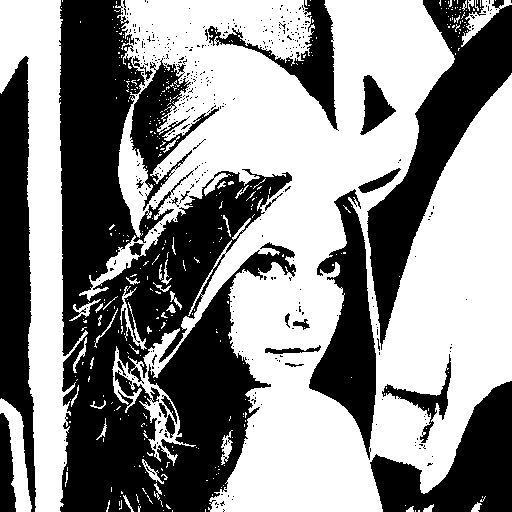

In [ ]:
import PIL.Image as Image
import io

image = Image.open(imagem)
image